In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
%matplotlib inline

# Figure 2. MDS visualization of Mn2,3,4+ spectra

In [2]:
# Load data
# Because of the uncertain calculation result of CTM4XAS in Mn4+ 10Dq=1.70 eV, 
# the spectrum with 10Dq=1.72 eV was used as 1.70 eV.
MnO_exp = pd.read_csv('MnOexp.csv')
xas = pd.read_csv('Mn_234.csv')
xas = xas.set_index(["Charge", "10Dq (eV)", "is_exp"], drop=True)

xas.head(5)

0         1         2         3         4  \
Charge 10Dq (eV) is_exp                                                     
2      0.0       False   0.006254  0.006533  0.006833  0.007155  0.007503   
       0.1       False   0.006302  0.006587  0.006893  0.007223  0.007580   
       0.2       False   0.006437  0.006736  0.007060  0.007412  0.007798   
       0.3       False   0.006629  0.006952  0.007303  0.007691  0.008122   
       0.4       False   0.006865  0.007218  0.007609  0.008046  0.008539   

                                5         6         7         8         9  \
Charge 10Dq (eV) is_exp                                                     
2      0.0       False   0.007879  0.008286  0.008730  0.009214  0.009743   
       0.1       False   0.007969  0.008394  0.008860  0.009376  0.009952   
       0.2       False   0.008222  0.008695  0.009228  0.009839  0.010547   
       0.3       False   0.008606  0.009158  0.009801  0.010566  0.011494   
       0.4       False   0.009105  0.009770  0.010570  0.011556  0.012796   

                           ...          331       332       333       334  \
Charge 10Dq (eV) is_exp    ...                                              
2      0.0       False     ...     0.009802  0.009316  0.008862  0.008449   
       0.1       False     ...     0.009843  0.009364  0.008915  0.008506   
       0.2       False     ...     0.009950  0.009489  0.009058  0.008662   
       0.3       False     ...     0.010082  0.009648  0.009241  0.008863   
       0.4       False     ...     0.010220  0.009817  0.009436  0.009078   

                              335       336       337       338       339  \
Charge 10Dq (eV) is_exp                                                     
2      0.0       False   0.008084  0.007770  0.007508  0.007291  0.007111   
       0.1       False   0.008143  0.007828  0.007562  0.007339  0.007153   
       0.2       False   0.008304  0.007987  0.007711  0.007474  0.007270   
       0.3       False   0.008514  0.008197  0.007911  0.007655  0.007426   
       0.4       False   0.008741  0.008426  0.008132  0.007858  0.007603   

                              340  
Charge 10Dq (eV) is_exp            
2      0.0       False   0.006957  
       0.1       False   0.006991  
       0.2       False   0.007089  
       0.3       False   0.007219  
       0.4       False   0.007368  

[5 rows x 341 columns]

Text(0,0.5,'Relative Intensity')

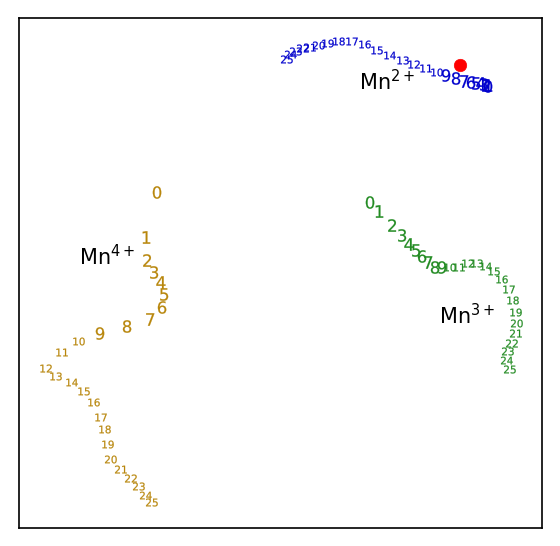

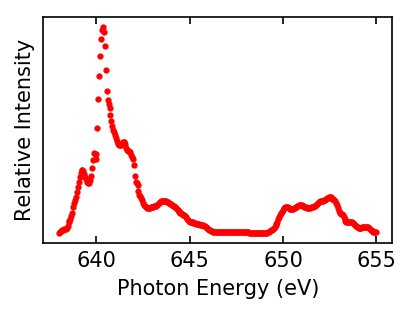

In [3]:
#calculate MDS
mds = manifold.MDS(n_components=2, random_state=32)
mds_result = mds.fit_transform(xas)

#plot MDS 
# red circle -> Experiment (MnO, 10Dq = 0.9 eV)
# blue numbers -> Mn2+
# green numbers -> Mn3+
# yellow numbers -> Mn4+
color = {2:'mediumblue', 3:'forestgreen', 4:'darkgoldenrod'}
plt.figure(figsize=(4.5, 4.5), dpi=150)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.scatter(mds_result[-1, 0], mds_result[-1, 1], c='red', linewidths=0.3)
for i in range(mds_result[:-1].shape[0]):
    charge = xas.index.get_level_values(0)[i]
    dq = int(float(xas.index.get_level_values(1)[i])*10)
    plt.scatter(mds_result[i, 0], mds_result[i, 1], marker='${}$'.format(dq), c=color[charge], linewidths=0.1)

plt.yticks([])
plt.xticks([])
plt.text(0.5, 2.5,"Mn$^{2+}$",fontsize=10);
plt.text(1.8, -1.5,"Mn$^{3+}$",fontsize=10);
plt.text(-4, -0.5,"Mn$^{4+}$",fontsize=10);
plt.savefig('../fig2_4/MDS.pdf', bbox_inches = 'tight')

#plot inset spectrum of figure 2
plt.figure(figsize=(3, 2),dpi=150)
plt.tick_params(direction='in',top=True,right=True)
plt.plot(MnO_exp['PhotonEnergy'], MnO_exp['MnO_XAS'],
         'o',markersize=2, label = 'Original', color='red')
plt.yticks([])
plt.xlabel('Photon Energy (eV)')
plt.ylabel('Relative Intensity')

# Figure 4.
### Comparison of the measured MnO XAS spectrum, and the Mn2+ XAS spectrum calculated with the estimated value of 10Dq (0.9 eV).

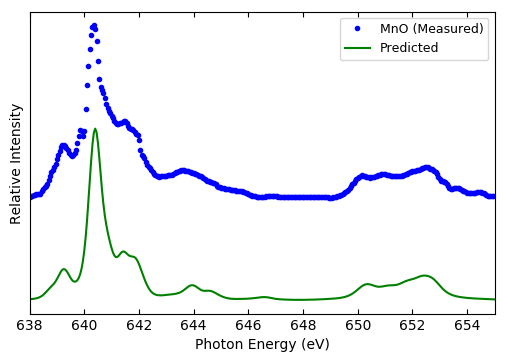

In [4]:
plt.figure(figsize=(6, 4),dpi=100)
plt.tick_params(direction='in',top=True,right=True)

plt.plot(MnO_exp['PhotonEnergy'], xas.loc[(2, 0.9, True)]/xas.loc[(2, 0.9, True)].max() + 0.6,
         'o', label = 'MnO (Measured)', color='blue', markersize=3)
plt.plot(MnO_exp['PhotonEnergy'], xas.loc[(2, 0.9, False)]/xas.loc[(2, 0.9, False)].max(),
         label = 'Predicted', color='green')
plt.yticks([])
plt.xlim(638,655)
plt.ylabel("Relative Intensity")
plt.xlabel("Photon Energy (eV)")
plt.legend(fontsize=9);